In [5]:
import pandas as pd
from sklearn.datasets import load_digits

In [7]:
digit=load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

models={
    "svm":{
        "model":svm.SVC(gamma="auto"),
        "parms":{
            "random_state":[1,2,3,4,5]
        }
    },
    "random_forest":{
        "model":RandomForestClassifier(),
        "parms":{
            "criterion":["entropy","gini","log_loss"]
        }
    },
    "logistic_regraion":{
        "model":LogisticRegression(C=2),
        "parms":{
            "C":[1,2,3,4,5]
        }
    },
    "gaussianNB":{
        "model":GaussianNB(),
        "parms":{
        }
    },
    "DecisionTreeClassifier":{
        "model":DecisionTreeClassifier(),
        "parms":{
            "random_state":[1,2,3,4,5],
            "criterion":["entropy","gini","log_loss"]
        }
    },
    "MultinomialNB":{
        "model":MultinomialNB(),
        "parms":{
        }
    },
}

In [11]:
score=[]
for model_name,mp in models.items():
    clf=GridSearchCV(mp["model"],mp["parms"],cv=5,return_train_score=False)
    clf.fit(digit.data,digit.target)
    score.append({
        "model":model_name,
        "params":mp["parms"],
        "best_score":clf.best_score_,
        "best_parm":clf.best_params_
    })

c:\Users\baps\OneDrive\Desktop\Projects\aiml\practice\aimlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\baps\OneDrive\Desktop\Projects\aiml\practice\aimlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [12]:
score

[{'model': 'svm',
  'params': {'random_state': [1, 2, 3, 4, 5]},
  'best_score': 0.448545341999381,
  'best_parm': {'random_state': 1}},
 {'model': 'random_forest',
  'params': {'criterion': ['entropy', 'gini', 'log_loss']},
  'best_score': 0.937137109254101,
  'best_parm': {'criterion': 'entropy'}},
 {'model': 'logistic_regraion',
  'params': {'C': [1, 2, 3, 4, 5]},
  'best_score': 0.9137650882079852,
  'best_parm': {'C': 1}},
 {'model': 'gaussianNB',
  'params': {},
  'best_score': 0.8069281956050759,
  'best_parm': {}},
 {'model': 'DecisionTreeClassifier',
  'params': {'random_state': [1, 2, 3, 4, 5],
   'criterion': ['entropy', 'gini', 'log_loss']},
  'best_score': 0.8185995047972764,
  'best_parm': {'criterion': 'entropy', 'random_state': 5}},
 {'model': 'MultinomialNB',
  'params': {},
  'best_score': 0.8703497369235531,
  'best_parm': {}}]

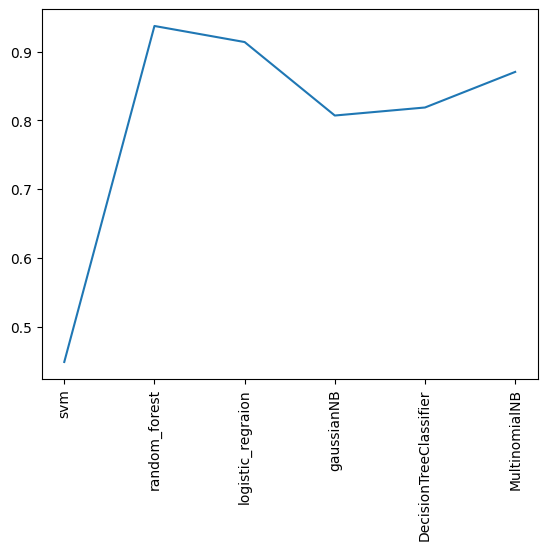

In [17]:
import matplotlib.pyplot as plt 

plt.xticks(rotation=90)
plt.plot([i["model"] for i in score ],[i["best_score"] for i in score ])